
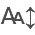

In [8]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import time
import pandas as pd
import re
import json
import os
import csv
import requests
from utils import save_json, split_and_explode
from datetime import datetime, timedelta


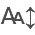

In [9]:
from itables import show, init_notebook_mode
init_notebook_mode(all_interactive=True)
import itables.options as opt
opt.lengthMenu = [2, 5, 10, 20, 50,100,200,500]

In [10]:
lang = 'he'
json_file_path = f'./data/alarms_history_{lang}.json'

# fetch_data

In [11]:
%run FetchAlerts.py

Fetching data from 24.10.2024 to 25.10.2024 (days_range: 730)
Number of records: 289


# Load Data from Json

In [12]:
# Loading the data from JSON file
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Creating a DataFrame from the JSON data
df_alarm_ht_raw = pd.DataFrame(data)
# Convert 'date' to datetime
df_alarm_ht_raw['date'] = pd.to_datetime(df_alarm_ht_raw['date'], dayfirst=True)
df_alarm_ht_raw['alertDate'] = pd.to_datetime(df_alarm_ht_raw['alertDate'])

# Displaying the DataFrame
display(df_alarm_ht_raw)

data       date      time  \
0                  באר שבע 288, באר שבע 289, באר שבע 291 2014-07-24  17:05:26   
1      באר שבע 288, אשקלון 256, באר שבע 289, באר שבע 291 2014-07-24  17:05:35   
2                   אשקלון 256, באר שבע 289, באר שבע 291 2014-07-24  17:05:59   
3                               באר שבע 289, באר שבע 291 2014-07-24  17:06:02   
4                  באר שבע 288, באר שבע 289, באר שבע 291 2014-07-24  17:06:08   
...                                                  ...        ...       ...   
43234                                               דפנה 2024-10-25  19:20:24   
43235                                            מרגליות 2024-10-25  19:29:27   
43236                                            משגב עם 2024-10-25  19:29:27   
43237                                               מנרה 2024-10-25  19:29:30   
43238                                            משגב עם 2024-10-25  21:38:07   

                alertDate  category     category_desc  matrix_id    rid  
0     2014-07-24 17:05:00         1  ירי רקטות וטילים          1      1  
1     2014-07-24 17:06:00         1  ירי רקטות וטילים          1      2  
2     2014-07-24 17:06:00         1  ירי רקטות וטילים          1      3  
3     2014-07-24 17:06:00         1  ירי רקטות וטילים          1      4  
4     2014-07-24 17:06:00         1  ירי רקטות וטילים          1      5  
...                   ...       ...               ...        ...    ...  
43234 2024-10-25 19:20:00         1  ירי רקטות וטילים          1  47170  
43235 2024-10-25 19:29:00         1  ירי רקטות וטילים          1  47171  
43236 2024-10-25 19:29:00         1  ירי רקטות וטילים          1  47172  
43237 2024-10-25 19:30:00         1  ירי רקטות וטילים          1  47173  
43238 2024-10-25 21:38:00         1  ירי רקטות וטילים          1  47174  

[43239 rows x 8 columns]

# Split records to Separate areas

In [13]:
df_alarm_ht_split = split_and_explode(df_alarm_ht_raw,'data')

display(df_alarm_ht_split)

data       date      time           alertDate  category  \
0      באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
1      באר שבע 289 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
2      באר שבע 291 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
3      באר שבע 288 2014-07-24  17:05:35 2014-07-24 17:06:00         1   
4       אשקלון 256 2014-07-24  17:05:35 2014-07-24 17:06:00         1   
...            ...        ...       ...                 ...       ...   
46828         דפנה 2024-10-25  19:20:24 2024-10-25 19:20:00         1   
46829      מרגליות 2024-10-25  19:29:27 2024-10-25 19:29:00         1   
46830      משגב עם 2024-10-25  19:29:27 2024-10-25 19:29:00         1   
46831         מנרה 2024-10-25  19:29:30 2024-10-25 19:30:00         1   
46832      משגב עם 2024-10-25  21:38:07 2024-10-25 21:38:00         1   

          category_desc  matrix_id    rid  
0      ירי רקטות וטילים          1      1  
1      ירי רקטות וטילים          1      1  
2      ירי רקטות וטילים          1      1  
3      ירי רקטות וטילים          1      2  
4      ירי רקטות וטילים          1      2  
...                 ...        ...    ...  
46828  ירי רקטות וטילים          1  47170  
46829  ירי רקטות וטילים          1  47171  
46830  ירי רקטות וטילים          1  47172  
46831  ירי רקטות וטילים          1  47173  
46832  ירי רקטות וטילים          1  47174  

[46787 rows x 8 columns]

In [7]:
# Fixing city names manualy
# Dictionary of replacements
replacements = {
    'מרחב אשקלון':
        'אשקלון',
    'מרחב אשדוד':
        'אשדוד',
    # 'זןהר':'זוהר‭',
    # 'סיט': 'אשדוד סיטי',
    # 'אשדוד -יא': 'אשדוד',
    # 'Third City': 'Third New Detailed Name'
}

# Perform the replacement using regular expressions
for old, new in replacements.items():
    df_alarm_ht_split['data'] = df_alarm_ht_split['data'].str.replace(old, new, regex=True)

# Display the result for the specific rid
display(df_alarm_ht_split[df_alarm_ht_split['rid'] == 20])

data       date      time           alertDate  category  \
32    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
33    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
34  עוטף עזה 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
35    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   

       category_desc  matrix_id  rid  
32  ירי רקטות וטילים          1   20  
33  ירי רקטות וטילים          1   20  
34  ירי רקטות וטילים          1   20  
35  ירי רקטות וטילים          1   20

# Loading defend area data

In [8]:
defend_areas_file_path = './data/defend_areas.json'

# Load the DataFrame from the JSON file
df_defend_areas = pd.read_json(defend_areas_file_path, orient='records', lines=True)
# Rename columns in df_defend_areas_from_json
df_defend_areas.columns = ['City', 'Defense Time', 'Polygon Number']

display(df_defend_areas)

City Defense Time Polygon Number
0                 א דהאבשה     דקה וחצי        נגב 299
1     א דיר במזרח הר חברון     דקה וחצי      יהודה 200
2     א דיר במערב הר חברון     דקה וחצי      יהודה 188
3                  א דיראת     דקה וחצי      יהודה 207
4                 א דנפירי     דקה וחצי        נגב 300
...                    ...          ...            ...
1850     תראבין א צאנה שבט     דקה וחצי        נגב 300
1851                 תראמה     דקה וחצי      יהודה 207
1852                תרדיון          דקה  גליל תחתון 60
1853                  תרום     דקה וחצי    בית שמש 188
1854               תרקומיא     דקה וחצי      יהודה 188

[1855 rows x 3 columns]

In [9]:
import pandas as pd
import json

# Load cities.json
with open('data/cities.json', 'r', encoding='utf-8') as f:
    cities_data = json.load(f)

# Convert JSON to DataFrame
df_cities = pd.DataFrame(cities_data)

# Display the columns of df_cities to see what we have
print(df_cities.columns)

# Define the columns to merge from df_cities
predefined_columns = ['id', 'name', 'name_en',
                    #   'name_ru', 'name_ar', 'zone', 'zone_en', 'zone_ru', 'zone_ar', 'time', 'time_en', 'time_ru', 'time_ar', 'countdown', 
       'lat', 'lng', 'value'
    #    , 'shelters'
       ]  # Replace 'another_column' with actual column names you want

# Keep only the predefined columns
df_cities = df_cities[predefined_columns]

# Drop rows where id is 0
df_cities = df_cities[df_cities['id'] != 0]
display(df_cities[predefined_columns])

Index(['id', 'name', 'name_en', 'name_ru', 'name_ar', 'zone', 'zone_en',
       'zone_ru', 'zone_ar', 'time', 'time_en', 'time_ru', 'time_ar',
       'countdown', 'lat', 'lng', 'value', 'shelters'],
      dtype='object')


id               name                  name_en       lat       lng  \
1     1470.0           אבו סנאן                 Abu Snan  32.95930  35.16860   
2       92.0         אבו קרינאת               Abu Qrenat  31.12390  34.96410   
3      103.0           אבו תלול                Abu Talul  31.19070  34.92460   
4      511.0            אבו-גוש                Abu Ghosh  31.80595  35.11005   
5     1363.0            אבטליון                 Avtalion  32.83690  35.35145   
...      ...                ...                      ...       ...       ...   
1373   167.0               תפרח                  Tifrach  31.32600  34.67640   
1374   222.0              תקומה                    Tkuma  31.44955  34.57980   
1375   221.0  תקומה וחוות יזרעם  Tkuma And Havat Izra'am  31.44270  34.57170   
1376   330.0               תקוע                    Tko'a  31.64610  35.23450   
1377   461.0               תרום                    Tarom  31.78310  34.98245   

                  value  
1              אבו סנאן  
2            אבו קרינאת  
3              אבו תלול  
4               אבו-גוש  
5               אבטליון  
...                 ...  
1373               תפרח  
1374              תקומה  
1375  תקומה וחוות יזרעם  
1376               תקוע  
1377               תרום  

[1377 rows x 6 columns]

In [10]:
df_cities_split = split_and_explode(df_cities,'value')
display(df_cities_split)


id               name                  name_en       lat       lng  \
0     1470.0           אבו סנאן                 Abu Snan  32.95930  35.16860   
1       92.0         אבו קרינאת               Abu Qrenat  31.12390  34.96410   
2      103.0           אבו תלול                Abu Talul  31.19070  34.92460   
3      511.0            אבו-גוש                Abu Ghosh  31.80595  35.11005   
4     1363.0            אבטליון                 Avtalion  32.83690  35.35145   
...      ...                ...                      ...       ...       ...   
1383   167.0               תפרח                  Tifrach  31.32600  34.67640   
1384   222.0              תקומה                    Tkuma  31.44955  34.57980   
1385   221.0  תקומה וחוות יזרעם  Tkuma And Havat Izra'am  31.44270  34.57170   
1386   330.0               תקוע                    Tko'a  31.64610  35.23450   
1387   461.0               תרום                    Tarom  31.78310  34.98245   

                  value  
0              אבו סנאן  
1            אבו קרינאת  
2              אבו תלול  
3               אבו-גוש  
4               אבטליון  
...                 ...  
1383               תפרח  
1384              תקומה  
1385  תקומה וחוות יזרעם  
1386               תקוע  
1387               תרום  

[1388 rows x 6 columns]

# Joining alerts and defend area data

In [11]:
# Perform the join
df_alarm_ht_def_areas = pd.merge(df_alarm_ht_split, df_defend_areas, left_on='data', right_on='Polygon Number', how='left')

# Display the resulting DataFrame to check the join
# display(df_alarm_ht_def_areas.head())
display(df_alarm_ht_def_areas[df_alarm_ht_def_areas['rid'] == 20])

data       date      time           alertDate  category  \
80    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
81    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
82    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
83    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
84    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
85    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
86    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
87    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
88    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
89  עוטף עזה 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
90    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
91    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
92    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
93    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
94    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
95    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
96    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
97    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
98    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
99    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   

       category_desc  matrix_id  rid        City Defense Time Polygon Number  
80  ירי רקטות וטילים          1   20   בית שיקמה     30 שניות     אשקלון 250  
81  ירי רקטות וטילים          1   20      בת הדר     30 שניות     אשקלון 250  
82  ירי רקטות וטילים          1   20        גיאה     15 שניות     אשקלון 250  
83  ירי רקטות וטילים          1   20     מבקיעים     15 שניות     אשקלון 250  
84  ירי רקטות וטילים          1   20    תלמי יפה     15 שניות     אשקלון 250  
85  ירי רקטות וטילים          1   20    ברור חיל     15 שניות     אשקלון 251  
86  ירי רקטות וטילים          1   20         חלץ     15 שניות     אשקלון 251  
87  ירי רקטות וטילים          1   20     שדה דוד     30 שניות     אשקלון 251  
88  ירי רקטות וטילים          1   20       תלמים     30 שניות     אשקלון 251  
89  ירי רקטות וטילים          1   20       גברעם     15 שניות   עוטף עזה 251  
90  ירי רקטות וטילים          1   20        זוהר     30 שניות     אשקלון 249  
91  ירי רקטות וטילים          1   20      יד נתן     30 שניות     אשקלון 249  
92  ירי רקטות וטילים          1   20  כוכב מיכאל     30 שניות     אשקלון 249  
93  ירי רקטות וטילים          1   20        נגבה     30 שניות     אשקלון 249  
94  ירי רקטות וטילים          1   20       נהורה     30 שניות     אשקלון 249  
95  ירי רקטות וטילים          1   20        נוגה     30 שניות     אשקלון 249  
96  ירי רקטות וטילים          1   20     ניר ח"ן     30 שניות     אשקלון 249  
97  ירי רקטות וטילים          1   20        עוצם     30 שניות     אשקלון 249  
98  ירי רקטות וטילים          1   20    שדה יואב     30 שניות     אשקלון 249  
99  ירי רקטות וטילים          1   20         שחר     30 שניות     אשקלון 249

In [12]:
# Assuming df_joined is the DataFrame resulting from your previous join
# and it contains both 'City' from df_defend_areas_from_json and 'data' from df
# df_alarm_ht_def_areas['Coalesced_City_Data'] = df_alarm_ht_def_areas['City'].combine_first(df_alarm_ht_def_areas['data'])
df_alarm_ht_def_areas['City'] = df_alarm_ht_def_areas['City'].combine_first(df_alarm_ht_def_areas['data'])
# display(df_alarm_ht_def_areas)
display(df_alarm_ht_def_areas[df_alarm_ht_def_areas['rid'] == 20])

data       date      time           alertDate  category  \
80    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
81    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
82    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
83    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
84    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
85    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
86    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
87    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
88    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
89  עוטף עזה 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
90    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
91    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
92    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
93    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
94    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
95    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
96    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
97    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
98    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
99    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   

       category_desc  matrix_id  rid        City Defense Time Polygon Number  
80  ירי רקטות וטילים          1   20   בית שיקמה     30 שניות     אשקלון 250  
81  ירי רקטות וטילים          1   20      בת הדר     30 שניות     אשקלון 250  
82  ירי רקטות וטילים          1   20        גיאה     15 שניות     אשקלון 250  
83  ירי רקטות וטילים          1   20     מבקיעים     15 שניות     אשקלון 250  
84  ירי רקטות וטילים          1   20    תלמי יפה     15 שניות     אשקלון 250  
85  ירי רקטות וטילים          1   20    ברור חיל     15 שניות     אשקלון 251  
86  ירי רקטות וטילים          1   20         חלץ     15 שניות     אשקלון 251  
87  ירי רקטות וטילים          1   20     שדה דוד     30 שניות     אשקלון 251  
88  ירי רקטות וטילים          1   20       תלמים     30 שניות     אשקלון 251  
89  ירי רקטות וטילים          1   20       גברעם     15 שניות   עוטף עזה 251  
90  ירי רקטות וטילים          1   20        זוהר     30 שניות     אשקלון 249  
91  ירי רקטות וטילים          1   20      יד נתן     30 שניות     אשקלון 249  
92  ירי רקטות וטילים          1   20  כוכב מיכאל     30 שניות     אשקלון 249  
93  ירי רקטות וטילים          1   20        נגבה     30 שניות     אשקלון 249  
94  ירי רקטות וטילים          1   20       נהורה     30 שניות     אשקלון 249  
95  ירי רקטות וטילים          1   20        נוגה     30 שניות     אשקלון 249  
96  ירי רקטות וטילים          1   20     ניר ח"ן     30 שניות     אשקלון 249  
97  ירי רקטות וטילים          1   20        עוצם     30 שניות     אשקלון 249  
98  ירי רקטות וטילים          1   20    שדה יואב     30 שניות     אשקלון 249  
99  ירי רקטות וטילים          1   20         שחר     30 שניות     אשקלון 249

In [13]:
# Merge the DataFrames on 'value' from cities.json and 'Coalesced_City_Data' from df_joined_def_areas
df_alarm_ht_def_areas_city = df_alarm_ht_def_areas.merge(
    df_cities_split[predefined_columns], 
    how='left', 
    left_on='City', 
    right_on='value'
)

# Display the merged DataFrame
# display(df_alarm_ht_def_areas_city)
display(df_alarm_ht_def_areas_city[df_alarm_ht_def_areas_city['rid'] == 20])

data       date      time           alertDate  category  \
80    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
81    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
82    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
83    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
84    אשקלון 250 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
85    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
86    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
87    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
88    אשקלון 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
89  עוטף עזה 251 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
90    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
91    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
92    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
93    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
94    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
95    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
96    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
97    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
98    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   
99    אשקלון 249 2014-07-27  16:41:47 2014-07-27 16:42:00         1   

       category_desc  matrix_id  rid        City Defense Time Polygon Number  \
80  ירי רקטות וטילים          1   20   בית שיקמה     30 שניות     אשקלון 250   
81  ירי רקטות וטילים          1   20      בת הדר     30 שניות     אשקלון 250   
82  ירי רקטות וטילים          1   20        גיאה     15 שניות     אשקלון 250   
83  ירי רקטות וטילים          1   20     מבקיעים     15 שניות     אשקלון 250   
84  ירי רקטות וטילים          1   20    תלמי יפה     15 שניות     אשקלון 250   
85  ירי רקטות וטילים          1   20    ברור חיל     15 שניות     אשקלון 251   
86  ירי רקטות וטילים          1   20         חלץ     15 שניות     אשקלון 251   
87  ירי רקטות וטילים          1   20     שדה דוד     30 שניות     אשקלון 251   
88  ירי רקטות וטילים          1   20       תלמים     30 שניות     אשקלון 251   
89  ירי רקטות וטילים          1   20       גברעם     15 שניות   עוטף עזה 251   
90  ירי רקטות וטילים          1   20        זוהר     30 שניות     אשקלון 249   
91  ירי רקטות וטילים          1   20      יד נתן     30 שניות     אשקלון 249   
92  ירי רקטות וטילים          1   20  כוכב מיכאל     30 שניות     אשקלון 249   
93  ירי רקטות וטילים          1   20        נגבה     30 שניות     אשקלון 249   
94  ירי רקטות וטילים          1   20       נהורה     30 שניות     אשקלון 249   
95  ירי רקטות וטילים          1   20        נוגה     30 שניות     אשקלון 249   
96  ירי רקטות וטילים          1   20     ניר ח"ן     30 שניות     אשקלון 249   
97  ירי רקטות וטילים          1   20        עוצם     30 שניות     אשקלון 249   
98  ירי רקטות וטילים          1   20    שדה יואב     30 שניות     אשקלון 249   
99  ירי רקטות וטילים          1   20         שחר     30 שניות     אשקלון 249   

       id        name         name_en       lat       lng       value  
80    NaN         NaN             NaN       NaN       NaN         NaN  
81  317.0      בת הדר       Bat Hadar  31.64710  34.59755      בת הדר  
82  306.0        גיאה            Ge'a  31.62735  34.60435        גיאה  
83  304.0     מבקיעים        Mavki'im  31.62220  34.57605     מבקיעים  
84  297.0    תלמי יפה    Talmei Yaffe  31.61555  34.61790    תלמי יפה  
85  267.0    ברור חיל      Bror Hayil  31.55810  34.64380    ברור חיל  
86  276.0         חלץ          Heletz  31.57775  34.65730         חלץ  
87  277.0     שדה דוד      Sdeh David  31.57510  34.68300     שדה דוד  
88  268.0       תלמים          Tlamim  31.56550  34.67225       תלמים  
89  282.0       גברעם          Gvaram  31.59175  34.61175       גברעם  
90  287.0        זוהר           Zohar  31.59585

In [14]:
print(df_alarm_ht_def_areas_city.columns)

Index(['data', 'date', 'time', 'alertDate', 'category', 'category_desc',
       'matrix_id', 'rid', 'City', 'Defense Time', 'Polygon Number', 'id',
       'name', 'name_en', 'lat', 'lng', 'value'],
      dtype='object')


# Filtering data for rockets only

In [15]:
# # Show rocket sirens only
# df_prep_02 = df_prep_01[df_prep_01['category'] == 1].copy()
df_alarm_ht_def_areas_city = df_alarm_ht_def_areas_city[df_alarm_ht_def_areas_city['category'] == 1]
display(df_alarm_ht_def_areas_city)

data       date      time           alertDate  category  \
0        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
1        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
2        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
3        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
4        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
...              ...        ...       ...                 ...       ...   
52363          זרעית 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
52364  ערב אל עראמשה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
52365          שומרה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
52366       כפר בלום 2024-06-28  14:21:48 2024-06-28 14:22:00         1   
52367           עמיר 2024-06-28  14:21:48 2024-06-28 14:22:00         1   

          category_desc  matrix_id    rid           City Defense Time  \
0      ירי רקטות וטילים          1      1         אופקים     45 שניות   
1      ירי רקטות וטילים          1      1         אופקים     45 שניות   
2      ירי רקטות וטילים          1      1          מסלול     30 שניות   
3      ירי רקטות וטילים          1      1         פדויים     45 שניות   
4      ירי רקטות וטילים          1      1            רנן     30 שניות   
...                 ...        ...    ...            ...          ...   
52363  ירי רקטות וטילים          1  33400          זרעית          NaN   
52364  ירי רקטות וטילים          1  33401  ערב אל עראמשה          NaN   
52365  ירי רקטות וטילים          1  33402          שומרה          NaN   
52366  ירי רקטות וטילים          1  33403       כפר בלום          NaN   
52367  ירי רקטות וטילים          1  33404           עמיר          NaN   

      Polygon Number      id           name          name_en       lat  \
0        באר שבע 288   155.0         אופקים           Ofakim  31.30830   
1        באר שבע 288   155.0         אופקים           Ofakim  31.30830   
2        באר שבע 288   162.0          מסלול           Maslul  31.32345   
3        באר שבע 288   166.0         פדויים            Pduim  31.32730   
4        באר שבע 288   172.0            רנן            Renan  31.33785   
...              ...     ...            ...              ...       ...   
52363            NaN  1603.0          זרעית            Zarit  33.09885   
52364            NaN  1593.0  ערב אל עראמשה  Arab Al-Aramshe  33.09095   
52365            NaN  1595.0          שומרה          Shomera  33.08440   
52366            NaN  1631.0       כפר בלום        Kfar Blum  33.17310   
52367            NaN  1633.0           עמיר             Amir  33.17780   

            lng          value  
0      34.62615         אופקים  
1      34.62615         אופקים  
2      34.58930          מסלול  
3      34.61115         פדויים  
4      34.60120            רנן  
...         ...            ...  
52363  35.28750          זרעית  
52364  35.22245  ערב אל עראמשה  
52365  35.28500          שומרה  
52366  35.60940       כפר בלום  
52367  35.62075           עמיר  

[48617 rows x 17 columns]

# Prepare unique city list for geoposition search

In [16]:
print(df_alarm_ht_def_areas_city.columns)


Index(['data', 'date', 'time', 'alertDate', 'category', 'category_desc',
       'matrix_id', 'rid', 'City', 'Defense Time', 'Polygon Number', 'id',
       'name', 'name_en', 'lat', 'lng', 'value'],
      dtype='object')


In [17]:
import pandas as pd
from coordinates_fetcher import update_coordinates
import shutil

# Define file paths
api_key_path = 'maps_api_geocode_key.json'
coords_file_path = 'data/city_to_coords.json'  # Correct path without '/mnt'

# Convert unique city names to a DataFrame
df_unique_cities = pd.DataFrame(df_alarm_ht_def_areas_city['City'].unique(), columns=['City'])

# Add 'lat' and 'lng' columns with NaN values
df_unique_cities['lat'] = pd.NA
df_unique_cities['lng'] = pd.NA

# Update the coordinates
df_unique_cities_enriched = update_coordinates(df_unique_cities, api_key_path, coords_file_path)

# Display the updated DataFrame
display(df_unique_cities_enriched)


ModuleNotFoundError: No module named 'geopy'

In [ ]:
# df_unique_cities_enriched.to_csv('./data/df_unique_cities_enriched.csv', index=False, encoding='utf-8-sig')

In [ ]:
# Merge the coordinates into the original DataFrame
df_alarm_ht_city_latlng_ggl_api = df_alarm_ht_def_areas_city.merge(df_unique_cities_enriched, on='City', how='left', suffixes=('', '_new'))

# Update the original DataFrame's lat and lng with the new values
df_alarm_ht_city_latlng_ggl_api['lat'] = df_alarm_ht_city_latlng_ggl_api['lat_new'].combine_first(df_alarm_ht_city_latlng_ggl_api['lat'])
df_alarm_ht_city_latlng_ggl_api['lng'] = df_alarm_ht_city_latlng_ggl_api['lng_new'].combine_first(df_alarm_ht_city_latlng_ggl_api['lng'])

# Drop the temporary columns used for merging
df_alarm_ht_city_latlng_ggl_api.drop(columns=['lat_new', 'lng_new'], inplace=True)

# Assign the updated DataFrame back to the original variable
df_alarm_ht_def_areas_city = df_alarm_ht_city_latlng_ggl_api

# Display the updated DataFrame
display(df_alarm_ht_def_areas_city)

data       date      time           alertDate  category  \
0        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
1        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
2        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
3        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
4        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
...              ...        ...       ...                 ...       ...   
48612          זרעית 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48613  ערב אל עראמשה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48614          שומרה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48615       כפר בלום 2024-06-28  14:21:48 2024-06-28 14:22:00         1   
48616           עמיר 2024-06-28  14:21:48 2024-06-28 14:22:00         1   

          category_desc  matrix_id    rid           City Defense Time  \
0      ירי רקטות וטילים          1      1         אופקים     45 שניות   
1      ירי רקטות וטילים          1      1         אופקים     45 שניות   
2      ירי רקטות וטילים          1      1          מסלול     30 שניות   
3      ירי רקטות וטילים          1      1         פדויים     45 שניות   
4      ירי רקטות וטילים          1      1            רנן     30 שניות   
...                 ...        ...    ...            ...          ...   
48612  ירי רקטות וטילים          1  33400          זרעית          NaN   
48613  ירי רקטות וטילים          1  33401  ערב אל עראמשה          NaN   
48614  ירי רקטות וטילים          1  33402          שומרה          NaN   
48615  ירי רקטות וטילים          1  33403       כפר בלום          NaN   
48616  ירי רקטות וטילים          1  33404           עמיר          NaN   

      Polygon Number      id           name          name_en        lat  \
0        באר שבע 288   155.0         אופקים           Ofakim  31.311337   
1        באר שבע 288   155.0         אופקים           Ofakim  31.311337   
2        באר שבע 288   162.0          מסלול           Maslul  31.323677   
3        באר שבע 288   166.0         פדויים            Pduim  31.326275   
4        באר שבע 288   172.0            רנן            Renan   31.33871   
...              ...     ...            ...              ...        ...   
48612            NaN  1603.0          זרעית            Zarit  33.098985   
48613            NaN  1593.0  ערב אל עראמשה  Arab Al-Aramshe  33.088834   
48614            NaN  1595.0          שומרה          Shomera   33.08247   
48615            NaN  1631.0       כפר בלום        Kfar Blum  33.172527   
48616            NaN  1633.0           עמיר             Amir  33.177726   

             lng          value  
0      34.622824         אופקים  
1      34.622824         אופקים  
2      34.590761          מסלול  
3      34.612069         פדויים  
4      34.600358            רנן  
...          ...            ...  
48612  35.288522          זרעית  
48613  35.228839  ערב אל עראמשה  
48614  35.281962          שומרה  
48615  35.607938       כפר בלום  
48616   35.61983           עמיר  

[48617 rows x 17 columns]

# Load existing coordinates if the file exists

In [ ]:
# import geopandas as gpd

# # Load GeoJSON data into a GeoDataFrame
# geo_df = gpd.read_file(r'C:\\Users\\b_ser\\OneDrive\\Document\\GitHub\\RedAlert\\data\\GIS\\muni_vaadim.geojson')

# # Display the GeoDataFrame to check if it's loaded correctly
# print(geo_df.head())


In [ ]:
# # List of columns to drop
# columns_to_drop = [
#     'Nafa1', 'Nafa2', 'Hearot', 'Eshkol_MPn', 'Sign_Date', 'Tikun1', 'Tikun2', 
#     'Tikun3', 'Tikun4', 'Tikun5', 'Tikun6', 'tikun7', 'tikun8', 'tikun9', 'tikun10', 
#     'tikun11', 'tikun12', 'tikun13', 'tikun14', 'tikun15', 'CR_PNIM', 'CR_LAMAS', 'CV_PNIM', 'CV_LAMAS', 'Machoz', 'Shape_Leng', 'Shape_Area',
#        'AreaSQM', 'Precision'
# ]

# # Drop the columns
# geo_df = geo_df.drop(columns=columns_to_drop, errors='ignore')

# # Check the remaining columns to ensure the drop was successful
# print(geo_df.columns)


In [ ]:
# # Initial merge attempt on 'Vaad_Heb'
# merged_df = df_prep_02.merge(geo_df, left_on='Coalesced_City_Data', right_on='Vaad_Heb', how='left')

# # Create mask for entries that failed to join
# mask = merged_df['Muni_Heb'].isnull()

# # Use the mask on merged_df directly for the fallback merge
# fallback_merged_df = merged_df.loc[mask].merge(geo_df, left_on='Coalesced_City_Data', right_on='Muni_Heb', how='left')

# # Drop the initial unsuccessful join columns from fallback_merged_df before concatenation
# fallback_merged_df.drop(columns=['Muni_Heb_y', 'Vaad_Heb_y'], inplace=True)
# fallback_merged_df.rename(columns={'Muni_Heb_x': 'Muni_Heb', 'Vaad_Heb_x': 'Vaad_Heb'}, inplace=True)

# # Combine the original merged data with the fallback data
# final_merged_df = pd.concat([merged_df[~mask], fallback_merged_df])

# print(final_merged_df.columns)
# # Drop unwanted '_y' columns if they are redundant or not needed
# columns_to_drop = [col for col in final_merged_df.columns if col.endswith('_y')]
# final_merged_df.drop(columns=columns_to_drop, inplace=True)

# # Optionally, you can rename '_x' columns back to their original names if needed
# columns_to_rename = {col: col.rstrip('_x') for col in final_merged_df.columns if col.endswith('_x')}
# final_merged_df.rename(columns=columns_to_rename, inplace=True)

# # Print the updated DataFrame columns to confirm changes
# print(final_merged_df.columns)


In [ ]:
# import pandas as pd

# # Print out the columns to visualize any duplicated names
# print("Columns before cleanup:", final_merged_df.columns.tolist())

# # Check for duplicate column names manually or automatically
# from collections import Counter
# column_counts = Counter(final_merged_df.columns)
# duplicated_columns = [col for col, count in column_counts.items() if count > 1]

# print("Duplicated columns:", duplicated_columns)

# # Assuming 'geometry_x' and 'geometry_y' are the resulting columns from the merge
# # We need to decide which geometry column to keep. This example keeps the first geometry column.
# # Drop the second occurrence of any duplicated column if they are indeed duplicates. Adjust as necessary.
# for col in duplicated_columns:
#     # Show unique values if necessary to confirm duplicates
#     # print(final_merged_df[[col + '_x', col + '_y']].drop_duplicates())

#     # Drop the second occurrence. Rename first as needed.
#     final_merged_df.drop(columns=[col], inplace=True)  # Adjust to select which to drop
#     # final_merged_df.rename(columns={col + '_x': col}, inplace=True)

# # Now rename columns if '_x' or '_y' suffixes were added incorrectly
# columns_to_rename = {col: col.rstrip('_x') for col in final_merged_df.columns if col.endswith('_x')}
# final_merged_df.rename(columns=columns_to_rename, inplace=True)

# # Check columns after cleanup
# print("Columns after cleanup:", final_merged_df.columns.tolist())


In [ ]:
# # Initial merge attempt on 'Vaad_Heb'
# merged_df = df_prep_02.merge(
#     geo_df, 
#     left_on='Coalesced_City_Data', 
#     right_on='Vaad_Heb', 
#     how='left', 
#     suffixes=('', '_geo')
# )

# # Create a mask for entries that failed to join based on 'Muni_Heb'
# mask = merged_df['Muni_Heb'].isnull()

# # Use the mask directly on merged_df for the fallback merge
# fallback_merged_df = merged_df[mask].merge(
#     geo_df,
#     left_on='Coalesced_City_Data', 
#     right_on='Muni_Heb', 
#     how='left', 
#     suffixes=('', '_fallback')
# )

# # Remove unnecessary '_geo' and '_fallback' columns if they exist
# columns_to_drop = [col for col in fallback_merged_df.columns if '_geo' in col or '_fallback' in col]
# fallback_merged_df.drop(columns=columns_to_drop, inplace=True)

# # Combine the original merged data with the fallback data
# final_merged_df = pd.concat([merged_df[~mask], fallback_merged_df])

# # Clean up column names if necessary
# # This step may need to be adjusted based on specific column handling needs
# columns_to_rename = {col: col.split('_')[0] for col in final_merged_df.columns if '_geo' in col}
# final_merged_df.rename(columns=columns_to_rename, inplace=True)

# # Print the final DataFrame columns to check for correctness
# print(final_merged_df.columns)


In [ ]:
# display(final_merged_df)

In [ ]:
# import geopandas as gpd
# from shapely.geometry import Polygon

# # Ensure that the GeoDataFrame is properly formed
# if not isinstance(final_merged_df, gpd.GeoDataFrame):
#     final_merged_df = gpd.GeoDataFrame(final_merged_df)

# # Explicitly reconstruct geometries to ensure they are 2D
# def convert_to_2d(geom):
#     if geom is None:
#         return None
#     if geom.geom_type == 'Polygon':
#         return Polygon([(x, y) for x, y, *rest in geom.exterior.coords])
#     return geom  # Handle other geometry types appropriately

# # Apply conversion to all geometries
# final_merged_df['geometry'] = final_merged_df['geometry'].apply(convert_to_2d)

# # Set the new geometry column as the active geometry column
# final_merged_df.set_geometry('geometry', inplace=True)

# # Check and set CRS if not set, assuming WGS 84
# if final_merged_df.crs is None:
#     final_merged_df.set_crs(epsg=4326, inplace=True)

# # Drop rows with None geometries, if any remain
# final_merged_df.dropna(subset=['geometry'], inplace=True)

# # Display the first few entries to ensure they are correctly formatted
# print(final_merged_df['geometry'].head())


In [ ]:
# import pandas as pd
# import geopandas as gpd
# from keplergl import KeplerGl

# # Load your GeoDataFrame
# geo_df = gpd.read_file(r'C:\Users\b_ser\OneDrive\Document\GitHub\RedAlert\data\GIS\muni_vaadim.geojson')

# # Assume df_prep_02 is already loaded and prepared

# # Create a mapping of 'Coalesced_City_Data' to 'Vaad_Heb' and 'Muni_Heb'
# key_map = {}
# for index, row in geo_df.iterrows():
#     if pd.notna(row['Vaad_Heb']):
#         key_map[row['Vaad_Heb']] = row['Vaad_Heb']
#     if pd.notna(row['Muni_Heb']):
#         key_map[row['Muni_Heb']] = row['Muni_Heb']

# # Apply the mapping to create a new 'merge_key' in df_prep_02
# df_prep_02['merge_key'] = df_prep_02['Coalesced_City_Data'].map(key_map)

# # Merge using this new 'merge_key'
# final_merged_df = df_prep_02.merge(geo_df, left_on='merge_key', right_on='Vaad_Heb', how='left')
# final_merged_df.update(
#     df_prep_02.merge(geo_df, left_on='merge_key', right_on='Muni_Heb', how='left')
# )

# # Ensure the result is a GeoDataFrame and handle geometries correctly
# final_merged_df = gpd.GeoDataFrame(final_merged_df, geometry='geometry')

# # Set CRS if it was lost during merging
# if final_merged_df.crs is None:
#     final_merged_df.set_crs(geo_df.crs, inplace=True)

# # Visualization with Kepler.gl
# map_2 = KeplerGl(height=600)
# map_2.add_data(data=final_merged_df, name='Merged Data')
# map_2


In [ ]:
# from keplergl import KeplerGl
# # Create a new kepler.gl map
# map_1 = KeplerGl(height=800)

# # Add data to the map
# map_1.add_data(data=final_merged_df, name='Alert Data')



In [ ]:
# import geopandas as gpd

# # Ensure final_merged_df is a GeoDataFrame
# if not isinstance(final_merged_df, gpd.GeoDataFrame):
#     final_merged_df = gpd.GeoDataFrame(final_merged_df)

# # Check for None geometries and remove those rows or handle them as needed
# final_merged_df = final_merged_df[final_merged_df['geometry'].notnull()]

# # Now convert the valid geometries to GeoJSON
# final_merged_df['geometry_json'] = final_merged_df['geometry'].apply(lambda x: x.__geo_interface__)


In [ ]:
# from keplergl import KeplerGl

# # Create a Kepler.gl map
# map_1 = KeplerGl(height=800)

# # Add the data to the map, ensuring you use the cleaned or handled geometry data
# map_1.add_data(data=final_merged_df, name='Alert Data')


# Fitch polygon for city

In [ ]:

# with open(coords_file_path, 'r') as file:
#     city_coords = json.load(file)

# enriched_data_path = './data/enriched_city_data.json'

# enriched_data = {}
# if os.path.exists(enriched_data_path):
#     try:
#         with open(enriched_data_path, 'r') as file:
#             enriched_data = json.load(file)
#     except json.JSONDecodeError:
#         enriched_data = {}

# for city, coords in city_coords.items():
#     if city not in enriched_data:
#         geojson_data = fetch_osm_polygon(coords[0], coords[1])
#         save_json({city: geojson_data}, enriched_data_path)


In [ ]:
# import json

# # Load GeoJSON data
# with open('./data/enriched_city_data.json', 'r') as file:
#     geojson_data = json.load(file)


# Assinging coordinates to cities

In [ ]:
# # Apply mapping on all data
# df_prep_02['outLat'] = df_prep_02['Coalesced_City_Data'].apply(lambda x: city_to_coords[x][0])
# df_prep_02['outLong'] = df_prep_02['Coalesced_City_Data'].apply(lambda x: city_to_coords[x][1])
# df_prep_02['alertDate'] = df_prep_02['alertDate'].astype(str)
# df_prep_02['date'] = df_prep_02['date'].dt.strftime('%Y-%m-%d')
# # display(df)

In [ ]:
# # Apply mapping on all data
# df_prep_02.loc[:, 'outLat'] = df_prep_02['Coalesced_City_Data'].apply(lambda x: city_to_coords[x][0])
# df_prep_02.loc[:, 'outLong'] = df_prep_02['Coalesced_City_Data'].apply(lambda x: city_to_coords[x][1])
# df_prep_02.loc[:, 'alertDate'] = df_prep_02['alertDate'].astype(str)
# df_prep_02.loc[:, 'date'] = df_prep_02['date'].dt.strftime('%Y-%m-%d')
# display(df_prep_02)

In [ ]:
# print(df_prep_02.dtypes)

In [ ]:
# # Assuming df is your DataFrame after loading JSON data
# import numpy as np
# import pandas as pd

# # Function to calculate the average latitude and longitude
# def calculate_average_lat_long(group):
#     avg_lat = np.mean(group['outLat'])
#     avg_long = np.mean(group['outLong'])
#     return pd.Series({'avgLat': avg_lat, 'avgLong': avg_long})

# # Group by 'rid' and apply the function, excluding group columns from the operation
# agg_df = df_prep_02.groupby('rid', as_index=False, group_keys=False).apply(calculate_average_lat_long)

# # Merge this aggregated data back into the main DataFrame
# df_prep_03 = df_prep_02.merge(agg_df, on='rid').copy()

# display(df_prep_03)
# display(df_prep_03[df_prep_03['rid'] == 28859])

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate the average latitude and longitude, excluding the group key handling
def calculate_average_lat_long(group):
    avg_lat = np.mean(group['lat'])
    avg_long = np.mean(group['lng'])
    return pd.Series([avg_lat, avg_long])

# Group by 'rid' and apply the function
agg_df = df_alarm_ht_def_areas_city.groupby('rid').apply(calculate_average_lat_long)

# Rename columns correctly after apply
agg_df.columns = ['avgLat', 'avgLong']

# Reset index to turn 'rid' back into a column (since it becomes an index after groupby)
agg_df = agg_df.reset_index()

# Merge this aggregated data back into the main DataFrame
df_prep_03 = df_alarm_ht_def_areas_city.merge(agg_df, on='rid').copy()

display(df_prep_03)

display(df_prep_03[df_prep_03['rid'] == 28859])

C:\Users\b_ser\AppData\Local\Temp\ipykernel_28340\4033619592.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_df = df_alarm_ht_def_areas_city.groupby('rid').apply(calculate_average_lat_long)


data       date      time           alertDate  category  \
0        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
1        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
2        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
3        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
4        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
...              ...        ...       ...                 ...       ...   
48612          זרעית 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48613  ערב אל עראמשה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48614          שומרה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48615       כפר בלום 2024-06-28  14:21:48 2024-06-28 14:22:00         1   
48616           עמיר 2024-06-28  14:21:48 2024-06-28 14:22:00         1   

          category_desc  matrix_id    rid           City Defense Time  \
0      ירי רקטות וטילים          1      1         אופקים     45 שניות   
1      ירי רקטות וטילים          1      1         אופקים     45 שניות   
2      ירי רקטות וטילים          1      1          מסלול     30 שניות   
3      ירי רקטות וטילים          1      1         פדויים     45 שניות   
4      ירי רקטות וטילים          1      1            רנן     30 שניות   
...                 ...        ...    ...            ...          ...   
48612  ירי רקטות וטילים          1  33400          זרעית          NaN   
48613  ירי רקטות וטילים          1  33401  ערב אל עראמשה          NaN   
48614  ירי רקטות וטילים          1  33402          שומרה          NaN   
48615  ירי רקטות וטילים          1  33403       כפר בלום          NaN   
48616  ירי רקטות וטילים          1  33404           עמיר          NaN   

      Polygon Number      id           name          name_en        lat  \
0        באר שבע 288   155.0         אופקים           Ofakim  31.311337   
1        באר שבע 288   155.0         אופקים           Ofakim  31.311337   
2        באר שבע 288   162.0          מסלול           Maslul  31.323677   
3        באר שבע 288   166.0         פדויים            Pduim  31.326275   
4        באר שבע 288   172.0            רנן            Renan   31.33871   
...              ...     ...            ...              ...        ...   
48612            NaN  1603.0          זרעית            Zarit  33.098985   
48613            NaN  1593.0  ערב אל עראמשה  Arab Al-Aramshe  33.088834   
48614            NaN  1595.0          שומרה          Shomera   33.08247   
48615            NaN  1631.0       כפר בלום        Kfar Blum  33.172527   
48616            NaN  1633.0           עמיר             Amir  33.177726   

             lng          value     avgLat    avgLong  
0      34.622824         אופקים  31.315178  34.636528  
1      34.622824         אופקים  31.315178  34.636528  
2      34.590761          מסלול  31.315178  34.636528  
3      34.612069         פדויים  31.315178  34.636528  
4      34.600358            רנן  31.315178  34.636528  
...          ...            ...        ...        ...  
48612  35.288522          זרעית  33.098985  35.288522  
48613  35.228839  ערב אל עראמשה  33.088834  35.228839  
48614  35.281962          שומרה  33.082470  35.281962  
48615  35.607938       כפר בלום  33.172527  35.607938  
48616   35.61983           עמיר  33.177726  35.619830  

[48617 rows x 19 columns]

data       date      time           alertDate  \
46376  אשדוד -יא,יב,טו,יז,מרינה,סיט 2024-03-25  14:00:04 2024-03-25 14:00:00   

       category     category_desc  matrix_id    rid  \
46376         1  ירי רקטות וטילים          1  28859   

                               City Defense Time Polygon Number     id  \
46376  אשדוד -יא,יב,טו,יז,מרינה,סיט          NaN            NaN  432.0   

                               name  \
46376  אשדוד -יא,יב,טו,יז,מרינה,סיט   

                                                 name_en        lat  \
46376  Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...  31.804381   

             lng                         value     avgLat    avgLong  
46376  34.655314  אשדוד -יא,יב,טו,יז,מרינה,סיט  31.804381  34.655314

In [ ]:
print(df_prep_03.dtypes)

data                      object
date              datetime64[ns]
time                      object
alertDate         datetime64[ns]
category                   int64
category_desc             object
matrix_id                  int64
rid                        int64
City                      object
Defense Time              object
Polygon Number            object
id                       float64
name                      object
name_en                   object
lat                       object
lng                       object
value                     object
avgLat                   float64
avgLong                  float64
dtype: object


In [ ]:
import pandas as pd
import numpy as np

# Function to calculate the distance from the group's average lat and long
def calculate_distance(row, avg_lat, avg_long):
    return np.sqrt((row['lat'] - avg_lat)**2 + (row['lng'] - avg_long)**2)

# Apply the function to each row in the DataFrame
df_prep_03['distance_from_avg'] = df_prep_03.apply(lambda row: calculate_distance(row, row['avgLat'], row['avgLong']), axis=1)

# Define a threshold for what you consider an outlier
# threshold = df_prep_03['distance_from_avg'].quantile(0.95) # for example, 95th percentile
threshold = 0.5

# Filter the DataFrame to only include outliers
outliers = df_prep_03[df_prep_03['distance_from_avg'] > threshold]
# display(outliers)
display(outliers)
# display(outliers[outliers['rid'] == 20])

data       date      time           alertDate  category  \
241    באר שבע 286 2014-07-27  17:21:39 2014-07-27 17:22:00         1   
273    באר שבע 286 2014-07-27  17:21:55 2014-07-27 17:22:00         1   
512    באר שבע 286 2014-07-27  17:22:33 2014-07-27 17:23:00         1   
632    באר שבע 286 2014-07-27  17:22:45 2014-07-27 17:23:00         1   
681    באר שבע 286 2014-07-27  17:22:53 2014-07-27 17:23:00         1   
...            ...        ...       ...                 ...       ...   
24171     ערבה 310 2019-01-02  10:06:20 2019-01-02 10:06:00         1   
24174     ערבה 310 2019-01-02  10:06:20 2019-01-02 10:06:00         1   
24175     ערבה 310 2019-01-02  10:06:20 2019-01-02 10:06:00         1   
24208   שומרון 127 2019-02-06  10:05:17 2019-02-06 10:05:00         1   
24209   שומרון 127 2019-02-06  10:05:17 2019-02-06 10:05:00         1   

          category_desc  matrix_id   rid          City Defense Time  \
241    ירי רקטות וטילים          1    27  מפעלי אבשלום     45 שניות   
273    ירי רקטות וטילים          1    28  מפעלי אבשלום     45 שניות   
512    ירי רקטות וטילים          1    33  מפעלי אבשלום     45 שניות   
632    ירי רקטות וטילים          1    36  מפעלי אבשלום     45 שניות   
681    ירי רקטות וטילים          1    37  מפעלי אבשלום     45 שניות   
...                 ...        ...   ...           ...          ...   
24171  ירי רקטות וטילים          1  4882          עידן       3 דקות   
24174  ירי רקטות וטילים          1  4882       עין תמר       3 דקות   
24175  ירי רקטות וטילים          1  4882     עיר אובות       3 דקות   
24208  ירי רקטות וטילים          1  4888       ג'ודירה     דקה וחצי   
24209  ירי רקטות וטילים          1  4888          ג'יב     דקה וחצי   

      Polygon Number      id       name    name_en        lat        lng  \
241      באר שבע 286     NaN        NaN        NaN  31.195397    34.3312   
273      באר שבע 286     NaN        NaN        NaN  31.195397    34.3312   
512      באר שבע 286     NaN        NaN        NaN  31.195397    34.3312   
632      באר שבע 286     NaN        NaN        NaN  31.195397    34.3312   
681      באר שבע 286     NaN        NaN        NaN  31.195397    34.3312   
...              ...     ...        ...        ...        ...        ...   
24171       ערבה 310    50.0       עידן       Idan  30.806291  35.299946   
24174       ערבה 310  1775.0    עין תמר  Ein Tamar  30.943594   35.37407   
24175       ערבה 310    51.0  עיר אובות    Ir Ovot  30.808967  35.244389   
24208     שומרון 127     NaN        NaN        NaN  31.046051  34.851612   
24209     שומרון 127     NaN        NaN        NaN  31.046051  34.851612   

           value     avgLat    avgLong  distance_from_avg  
241          NaN  31.346908  34.826045           0.517520  
273          NaN  31.314831  34.834887           0.517654  
512          NaN  31.345653  34.836822           0.527476  
632          NaN  31.344793  34.845956           0.535997  
681          NaN  31.349655  34.847746           0.539087  
...          ...        ...        ...                ...  
24171       עידן  30.316273  35.146907           0.513360  
24174    עין תמר  30.316273  35.146907           0.667184  
24175  עיר אובות  30.316273  35.146907           0.502245  
24208        NaN  31.580465  35.060485           0.573782  
24209        NaN  31.580465  35.060485           0.573782  

[715 rows x 20 columns]

In [ ]:
from geopy.distance import geodesic
# Central points with coordinates
sources = {
    # 'North Gaza': (31.5600, 34.4953),
    'North Gaza': (31.540477181629036, 34.56594995210597),
    'South Gaza': (31.22513272230714, 34.267723050601994),
    'Central Gaza': ((31.540477181629036 + 31.22513272230714) / 2, (34.565949952105974953 + 34.2677230506019942951) / 2),
    'South Lebanon': (33.05939871583828, 35.35166595731204),
    'Yemen': (15.56361074880308, 42.8564640870823)
}

# Define thresholds for each source
thresholds = {
    'North Gaza': 110,
    'South Gaza': 110,
    'Central Gaza': 110,
    'South Lebanon': 110,
    'Yemen': 100000
}

# Function to calculate distance from given point
def calculate_distance(row, point):
    target_point = (row['avgLat'], row['avgLong'])
    return geodesic(point, target_point).km

# Calculate distances from each source
for source_name, source_coords in sources.items():
    df_prep_03[f'distance_from_{source_name.replace(" ", "_").lower()}'] = df_prep_03.apply(calculate_distance, point=source_coords, axis=1)

# df_prep_04

In [ ]:
def determine_probable_source(row):
    # Calculate distances from each source and check against thresholds
    valid_sources = {source: distance for source, distance in 
                     {src: row[f'distance_from_{src.replace(" ", "_").lower()}'] for src in sources}.items() 
                     if distance <= thresholds[source]}
    
    # No valid sources within their thresholds
    if not valid_sources:
        return 'Unknown', 'Unknown', None, None

    # Find the closest valid source
    closest_source = min(valid_sources, key=valid_sources.get)
    closest_distance = valid_sources[closest_source]

    return closest_distance, closest_source, sources[closest_source][0], sources[closest_source][1]
df_prep_04 = df_prep_03.copy()
# Apply the function to determine the probable source
df_prep_04['closest_distance'], df_prep_04['source'], df_prep_04['fromlat'], df_prep_04['fromlng'] = zip(*df_prep_04.apply(determine_probable_source, axis=1))
display(df_prep_04)

data       date      time           alertDate  category  \
0        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
1        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
2        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
3        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
4        באר שבע 288 2014-07-24  17:05:26 2014-07-24 17:05:00         1   
...              ...        ...       ...                 ...       ...   
48612          זרעית 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48613  ערב אל עראמשה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48614          שומרה 2024-06-28  09:34:36 2024-06-28 09:35:00         1   
48615       כפר בלום 2024-06-28  14:21:48 2024-06-28 14:22:00         1   
48616           עמיר 2024-06-28  14:21:48 2024-06-28 14:22:00         1   

          category_desc  matrix_id    rid           City Defense Time  ...  \
0      ירי רקטות וטילים          1      1         אופקים     45 שניות  ...   
1      ירי רקטות וטילים          1      1         אופקים     45 שניות  ...   
2      ירי רקטות וטילים          1      1          מסלול     30 שניות  ...   
3      ירי רקטות וטילים          1      1         פדויים     45 שניות  ...   
4      ירי רקטות וטילים          1      1            רנן     30 שניות  ...   
...                 ...        ...    ...            ...          ...  ...   
48612  ירי רקטות וטילים          1  33400          זרעית          NaN  ...   
48613  ירי רקטות וטילים          1  33401  ערב אל עראמשה          NaN  ...   
48614  ירי רקטות וטילים          1  33402          שומרה          NaN  ...   
48615  ירי רקטות וטילים          1  33403       כפר בלום          NaN  ...   
48616  ירי רקטות וטילים          1  33404           עמיר          NaN  ...   

      distance_from_avg  distance_from_north_gaza distance_from_south_gaza  \
0              0.014232                 25.866032                36.514095   
1              0.014232                 25.866032                36.514095   
2              0.046549                 25.866032                36.514095   
3              0.026859                 25.866032                36.514095   
4              0.043151                 25.866032                36.514095   
...                 ...                       ...                      ...   
48612          0.000000                185.736090               229.012334   
48613          0.000000                182.694789               225.673979   
48614          0.000000                183.807832               227.094134   
48615          0.000000                205.846116               250.196448   
48616          0.000000                206.886180               251.259386   

      distance_from_central_gaza distance_from_south_lebanon  \
0                      22.208729                  204.834517   
1                      22.208729                  204.834517   
2                      22.208729                  204.834517   
3                      22.208729                  204.834517   
4                      22.208729                  204.834517   
...                          ...                         ...   
48612                 207.280907                    7.350836   
48613                 204.074520                   11.924531   
48614                 205.357314                    6.993722   
48615                 227.985296                   27.009110   
48616                 229.037980                   28.259225   

      distance_from_yemen closest_distance         source    fromlat  \
0             1934.402072        22.208729   Central Gaza  31.382805   
1             1934.402072        22.208729   Central Gaza  31.382805   
2             1934.402072        22.208729   Central Gaza  31.382805   
3             1934.402072        22.208729   Central Gaza  31.382805   
4             1934.402072        22.208729   Central Gaza  31.382805   
...                   ...              .

In [ ]:
# Check if there's any leftover datetime objects in the configuration
def convert_datetime(obj):
    if isinstance(obj, pd.Timestamp):
        return obj.strftime('%Y-%m-%d %H:%M:%S')
        # return obj.strftime('%Y-%m-%d')
    raise TypeError("Unserializable object {} of type {}".format(obj, type(obj)))

In [ ]:
# print(df_prep_04.dtypes)

In [ ]:
# Find records with unknown source in df_src_points
df_unknown_source = df_prep_04[df_prep_04['source'] == 'Unknown']

# Optionally, to view a few records with unknown sources
df_unknown_source.head()


Empty DataFrame
Columns: [data, date, time, alertDate, category, category_desc, matrix_id, rid, City, Defense Time, Polygon Number, id, name, name_en, lat, lng, value, avgLat, avgLong, distance_from_avg, distance_from_north_gaza, distance_from_south_gaza, distance_from_central_gaza, distance_from_south_lebanon, distance_from_yemen, closest_distance, source, fromlat, fromlng]
Index: []

[0 rows x 29 columns]

In [ ]:
def debug_determine_probable_source(row):
    print(f"Row Data: {row}")
    distances = {source: row[f'distance_from_{source.replace(" ", "_").lower()}'] for source in sources}
    print(f"Distances: {distances}")
    closest_source = min(distances, key=distances.get)
    print(f"Closest Source: {closest_source}")
    closest_distance = distances[closest_source]
    print(f"Closest Distance: {closest_distance}")

    if closest_distance <= thresholds[closest_source]:
        print("Source within threshold")
        return closest_distance, closest_source, sources[closest_source][0], sources[closest_source][1]
    else:
        print("Source beyond threshold")
        return 'Unknown', 'Unknown', None, None

# Check if unknown_sources_df is empty
if not df_unknown_source.empty:
    # Test with a sample row from Eilat
    sample_row = df_unknown_source.iloc[0]
    debug_determine_probable_source(sample_row)
else:
    print("There are no records with an unknown source.")


There are no records with an unknown source.


In [ ]:
import numpy as np
import pandas as pd

# Assuming df_src_points is your DataFrame with geographic data
# Replace 'lat' and 'lng' with the actual column names if they are different
df_prep_04['lat'] = df_prep_04['lat'].apply(lambda x: np.nan if x > 90 or x < -90 else x)
df_prep_04['lng'] = df_prep_04['lng'].apply(lambda x: np.nan if x > 180 or x < -180 else x)

# Drop rows where latitude or longitude are NaN
df_prep_04.dropna(subset=['lat', 'lng'], inplace=True)
df_prep_04['lat'] = df_prep_04['lat'].astype(float)
df_prep_04['lng'] = df_prep_04['lng'].astype(float)
# Drop the columns with many NaN values
# df_prep_04.drop(columns=['City', 'Defense Time', 'Polygon Number'], inplace=True)
# Convert datetime fields in the DataFrame again to ensure all are string
for column in df_prep_04.select_dtypes(include=['datetime64']):
    df_prep_04[column] = df_prep_04[column].dt.strftime('%Y-%m-%d %H:%M:%S')
display(df_prep_04)

data                 date      time            alertDate  \
0        באר שבע 288  2014-07-24 00:00:00  17:05:26  2014-07-24 17:05:00   
1        באר שבע 288  2014-07-24 00:00:00  17:05:26  2014-07-24 17:05:00   
2        באר שבע 288  2014-07-24 00:00:00  17:05:26  2014-07-24 17:05:00   
3        באר שבע 288  2014-07-24 00:00:00  17:05:26  2014-07-24 17:05:00   
4        באר שבע 288  2014-07-24 00:00:00  17:05:26  2014-07-24 17:05:00   
...              ...                  ...       ...                  ...   
48612          זרעית  2024-06-28 00:00:00  09:34:36  2024-06-28 09:35:00   
48613  ערב אל עראמשה  2024-06-28 00:00:00  09:34:36  2024-06-28 09:35:00   
48614          שומרה  2024-06-28 00:00:00  09:34:36  2024-06-28 09:35:00   
48615       כפר בלום  2024-06-28 00:00:00  14:21:48  2024-06-28 14:22:00   
48616           עמיר  2024-06-28 00:00:00  14:21:48  2024-06-28 14:22:00   

       category     category_desc  matrix_id    rid           City  \
0             1  ירי רקטות וטילים          1      1         אופקים   
1             1  ירי רקטות וטילים          1      1         אופקים   
2             1  ירי רקטות וטילים          1      1          מסלול   
3             1  ירי רקטות וטילים          1      1         פדויים   
4             1  ירי רקטות וטילים          1      1            רנן   
...         ...               ...        ...    ...            ...   
48612         1  ירי רקטות וטילים          1  33400          זרעית   
48613         1  ירי רקטות וטילים          1  33401  ערב אל עראמשה   
48614         1  ירי רקטות וטילים          1  33402          שומרה   
48615         1  ירי רקטות וטילים          1  33403       כפר בלום   
48616         1  ירי רקטות וטילים          1  33404           עמיר   

      Defense Time  ... distance_from_avg  distance_from_north_gaza  \
0         45 שניות  ...          0.014232                 25.866032   
1         45 שניות  ...          0.014232                 25.866032   
2         30 שניות  ...          0.046549                 25.866032   
3         45 שניות  ...          0.026859                 25.866032   
4         30 שניות  ...          0.043151                 25.866032   
...            ...  ...               ...                       ...   
48612          NaN  ...          0.000000                185.736090   
48613          NaN  ...          0.000000                182.694789   
48614          NaN  ...          0.000000                183.807832   
48615          NaN  ...          0.000000                205.846116   
48616          NaN  ...          0.000000                206.886180   

      distance_from_south_gaza distance_from_central_gaza  \
0                    36.514095                  22.208729   
1                    36.514095                  22.208729   
2                    36.514095                  22.208729   
3                    36.514095                  22.208729   
4                    36.514095                  22.208729   
...                        ...                        ...   
48612               229.012334                 207.280907   
48613               225.673979                 204.074520   
48614               227.094134                 205.357314   
48615               250.196448                 227.985296   
48616               251.259386                 229.037980   

       distance_from_south_lebanon  distance_from_yemen closest_distance  \
0                       204.834517          1934.402072        22.208729   
1                       204.834517          1934.402072        22.208729   
2                       204.834517          1934.402072        22.208729   
3                       204.834517          1934.402072        22.208729   
4                       204.834517          1934.402072        22.208729   
...                            ...                  ...              ...   
48612                     7.350836          2086.897053         7.350836   
48613                    11.924531          2088.071628        11.92

In [ ]:
df_prep_04.to_csv('./data/df_prep_04.csv', index=False, encoding
                  ='utf-8-sig')

In [ ]:
# save_json(df_prep_04, './data/df_prep_04.json')

In [ ]:
# print(df_prep_04.dtypes)

In [ ]:
# filtered_df = df_prep_04[df_prep_04['rid'] == 1718]
# display(filtered_df)

In [ ]:
# Install instructions available at - https://docs.kepler.gl/docs/keplergl-jupyter#install
from keplergl import KeplerGl
import requests

# Define the filename for the config file
config_filename = 'kepler_config.json'

# Check if the config file exists
if os.path.exists(config_filename):
    # Load the config from the file
    with open(config_filename, 'r', encoding='utf-8') as file:
        config = json.load(file)
    print("Config loaded from file.")
else:
    # Use a default config or define it here
    # config = {'version': 'v1', 'config': {}}  # Replace with your default configuration
    print("Using default config.")

# Now, use 'config' variable for your KeplerGl map
# kepler_map = KeplerGl(config=config)

Config loaded from file.


In [ ]:
# Define the height and width for the map (in pixels)
map_height = 700  # for example, 600 pixels in height
map_width = 1400   # for example, 800 pixels in width

# Create the KeplerGl object with the specified size
kepler_map = KeplerGl(height=map_height, width=map_width, config=config)
kepler_map.add_data(data=df_prep_04, name='OrefSirens')
kepler_map


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\ProgramData\Anaconda3\lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['OrefSirens'], 'id': 'ed77mh…

In [ ]:


# # Now that these columns are dropped, add the cleaned data to the KeplerGl map
# kepler_map = KeplerGl(height=700, width=250, config=config)
# kepler_map.add_data(data=df_prep_04, name='OrefSirens')
# display(kepler_map)

In [ ]:
# # Display statistics for floating-point columns to find anomalies like extreme values or NaNs
# print(df_prep_04.describe())

# # Check for NaNs specifically
# print(df_prep_04.isna().sum())


In [ ]:
# Assuming kepler_map is your KeplerGl object
config = kepler_map.config

# Define the filename for the config file
config_filename = 'kepler_config.json'

# Save the config to a JSON file
with open(config_filename, 'w', encoding='utf-8') as file:
    json.dump(config, file, ensure_ascii=False, indent=4)

print(f"Config saved to {config_filename}")

Config saved to kepler_config.json


In [ ]:
# # Assuming kepler_map is your KeplerGl object
# html_output = kepler_map._repr_html_()
# with open('kepler_map.html', 'w', encoding='utf-8') as file:
#     file.write(html_output)

# # kepler_map.save_to_html(file_name='kepler_map.html')

In [ ]:
# Assuming kepler_map is your KeplerGl object
html_output = kepler_map._repr_html_()

# Decode bytes to string if necessary
if isinstance(html_output, bytes):
    html_output = html_output.decode('utf-8')

# Save the HTML output to a file
with open('kepler_map.html', 'w', encoding='utf-8') as file:
    file.write(html_output)


In [ ]:
exit()

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.oref.org.il'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all script tags
scripts = soup.find_all('script')

for script in scripts:
    if script.string:
        if 'Ajax/Get' in script.string:
            print(script.string)


In [ ]:
import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
import re

def extract_js_endpoints(soup):
    endpoints = set()
    scripts = soup.find_all('script')
    for script in scripts:
        if script.string:
            matches = re.findall(r'/Shared/Ajax/Get\w+\.aspx', script.string)
            for match in matches:
                endpoints.add(match)
    return endpoints

def extract_comment_endpoints(soup):
    endpoints = set()
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))
    for comment in comments:
        matches = re.findall(r'/Shared/Ajax/Get\w+\.aspx', comment)
        for match in matches:
            endpoints.add(match)
    return endpoints

def check_endpoint(url):
    try:
        response = requests.get(url)
        if response.status_code == 200 and "404.html" not in response.url:
            return response.url
    except requests.exceptions.RequestException:
        return None
    return None

url = 'https://www.oref.org.il'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract potential endpoints from JavaScript and comments
js_endpoints = extract_js_endpoints(soup)
comment_endpoints = extract_comment_endpoints(soup)
all_endpoints = js_endpoints.union(comment_endpoints)

# Validate endpoints
base_url = "https://www.oref.org.il"
valid_endpoints = []

for endpoint in all_endpoints:
    full_url = f"{base_url}{endpoint}"
    valid_url = check_endpoint(full_url)
    if valid_url:
        valid_endpoints.append(valid_url)
        print(f"Valid endpoint: {valid_url}")

print("Valid endpoints found:")
for endpoint in valid_endpoints:
    print(endpoint)


In [ ]:
import requests

endpoint = "https://www.oref.org.il/Shared/Ajax/GetAlertsHistoryAreaData.aspx"
base_params = {
    'lang': 'he',
}

# Common parameter names to test
param_names = [
    'id', 'startDate', 'endDate', 'area', 'type', 'region', 'city', 'district'
]

# Example values to test with the parameters
param_values = [
    1, '2022-01-01', '2022-12-31', 'North', 'Alert', 'South', 'Tel Aviv', 'District 1'
]

def test_params(endpoint, base_params, param_names, param_values):
    valid_params = []
    for name in param_names:
        for value in param_values:
            params = base_params.copy()
            params[name] = value
            try:
                response = requests.get(endpoint, params=params)
                if response.status_code == 200 and '~~~ ~~~ ~~~ ~~~ ~~~' not in response.text:
                    print(f"Valid parameters: {params}")
                    valid_params.append(params)
            except requests.exceptions.RequestException as e:
                print(f"Error with parameters {params}: {e}")
    return valid_params

valid_params = test_params(endpoint, base_params, param_names, param_values)

print("Valid parameters found:")
for params in valid_params:
    print(params)


In [ ]:
import requests

endpoint = "https://www.oref.org.il/Shared/Ajax/GetAlertsHistoryAreaData.aspx"

# List of valid parameters
valid_params_list = [
    {'lang': 'he', 'id': 1},
    {'lang': 'he', 'id': '2022-01-01'},
    {'lang': 'he', 'id': '2022-12-31'},
    {'lang': 'he', 'id': 'North'},
    {'lang': 'he', 'id': 'Alert'},
    {'lang': 'he', 'id': 'South'},
    {'lang': 'he', 'id': 'Tel Aviv'},
    {'lang': 'he', 'id': 'District 1'},
    {'lang': 'he', 'area': 1},
    {'lang': 'he', 'area': '2022-01-01'},
    {'lang': 'he', 'area': '2022-12-31'},
    {'lang': 'he', 'area': 'North'},
    {'lang': 'he', 'area': 'Alert'},
    {'lang': 'he', 'area': 'South'},
    {'lang': 'he', 'area': 'Tel Aviv'},
    {'lang': 'he', 'area': 'District 1'},
    {'lang': 'he', 'type': 1},
    {'lang': 'he', 'type': '2022-01-01'},
    {'lang': 'he', 'type': '2022-12-31'},
    {'lang': 'he', 'type': 'North'},
    {'lang': 'he', 'type': 'Alert'},
    {'lang': 'he', 'type': 'South'},
    {'lang': 'he', 'type': 'Tel Aviv'},
    {'lang': 'he', 'type': 'District 1'},
    {'lang': 'he', 'city': 1},
    {'lang': 'he', 'city': '2022-01-01'},
    {'lang': 'he', 'city': '2022-12-31'},
    {'lang': 'he', 'city': 'North'},
    {'lang': 'he', 'city': 'Alert'},
    {'lang': 'he', 'city': 'South'},
    {'lang': 'he', 'city': 'Tel Aviv'},
    {'lang': 'he', 'city': 'District 1'}
]

# Function to check if the response contains useful data
def contains_useful_data(response_text):
    if '~~~ ~~~ ~~~ ~~~ ~~~' in response_text or not response_text.strip():
        return False
    return True

# Iterate through valid parameters and print responses with useful data
for params in valid_params_list:
    try:
        response = requests.get(endpoint, params=params)
        if response.status_code == 200 and contains_useful_data(response.text):
            print(f"Parameters {params} returned useful data:")
            print(response.text)
    except requests.exceptions.RequestException as e:
        print(f"Error with parameters {params}: {e}")


In [ ]:
import requests
from datetime import datetime, timedelta

endpoint = "https://www.oref.org.il/Shared/Ajax/GetAlertsHistoryAreaData.aspx"

# List of valid parameters with more specific values
specific_params_list = [
    {'lang': 'he', 'id': '2023-01-01'},
    {'lang': 'he', 'id': '2023-06-15'},
    {'lang': 'he', 'id': '2024-01-01'},
    {'lang': 'he', 'area': 'North'},
    {'lang': 'he', 'area': 'South'},
    {'lang': 'he', 'area': 'Central'},
    {'lang': 'he', 'type': 'Alert'},
    {'lang': 'he', 'type': 'Warning'},
    {'lang': 'he', 'city': 'Jerusalem'},
    {'lang': 'he', 'city': 'Tel Aviv'},
    {'lang': 'he', 'district': 'District 1'}
]

# Function to check if the response contains useful data
def contains_useful_data(response_text):
    if '~~~ ~~~ ~~~ ~~~ ~~~' in response_text or not response_text.strip():
        return False
    return True

# Iterate through specific parameters and print responses with useful data
for params in specific_params_list:
    try:
        response = requests.get(endpoint, params=params)
        if response.status_code == 200 and contains_useful_data(response.text):
            print(f"Parameters {params} returned useful data:")
            print(response.text)
    except requests.exceptions.RequestException as e:
        print(f"Error with parameters {params}: {e}")

# Test a range of dates
start_date = datetime.strptime('2023-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2023-12-31', '%Y-%m-%d')
current_date = start_date

while current_date <= end_date:
    params = {'lang': 'he', 'id': current_date.strftime('%Y-%m-%d')}
    try:
        response = requests.get(endpoint, params=params)
        if response.status_code == 200 and contains_useful_data(response.text):
            print(f"Parameters {params} returned useful data:")
            print(response.text)
    except requests.exceptions.RequestException as e:
        print(f"Error with parameters {params}: {e}")
    current_date += timedelta(days=1)


In [ ]:
import requests
from datetime import datetime, timedelta

endpoint = "https://www.oref.org.il/Shared/Ajax/GetAlertsHistoryAreaData.aspx"

# List of valid parameters with more specific values and correct date format
specific_params_list = [
    {'lang': 'he', 'id': '01.01.2023'},
    {'lang': 'he', 'id': '15.06.2023'},
    {'lang': 'he', 'id': '01.01.2024'},
    {'lang': 'he', 'area': 'North'},
    {'lang': 'he', 'area': 'South'},
    {'lang': 'he', 'area': 'Central'},
    {'lang': 'he', 'type': 'Alert'},
    {'lang': 'he', 'type': 'Warning'},
    {'lang': 'he', 'city': 'Jerusalem'},
    {'lang': 'he', 'city': 'Tel Aviv'},
    {'lang': 'he', 'district': 'District 1'}
]

# Function to check if the response contains useful data
def contains_useful_data(response_text):
    # Adjust the condition based on the actual response structure
    if '~~~' in response_text or response_text.strip() == '':
        return False
    return True

# Iterate through specific parameters and print responses with useful data
for params in specific_params_list:
    try:
        response = requests.get(endpoint, params=params)
        if response.status_code == 200 and contains_useful_data(response.text):
            print(f"Parameters {params} returned useful data:")
            print(response.text)
    except requests.exceptions.RequestException as e:
        print(f"Error with parameters {params}: {e}")

# Test a range of dates with correct date format
start_date = datetime.strptime('01.01.2023', '%d.%m.%Y')
end_date = datetime.strptime('31.12.2023', '%d.%m.%Y')
current_date = start_date

while current_date <= end_date:
    params = {'lang': 'he', 'id': current_date.strftime('%d.%m.%Y')}
    try:
        response = requests.get(endpoint, params=params)
        if response.status_code == 200 and contains_useful_data(response.text):
            print(f"Parameters {params} returned useful data:")
            print(response.text)
    except requests.exceptions.RequestException as e:
        print(f"Error with parameters {params}: {e}")
    current_date += timedelta(days=1)
